# Introduction

We are **Vector Nation**. Composed of the following:
- Ariaga, Marian
- Clemente, Francis
- De Guzman, Evan
- Villaflores, Charlize

Taking STINTSY, section S16 under Sir Alvin Alon. 

This **Major Course Output (MCO)** aims to solve a classification task using the Philippine Statistics Authority or PSA's <span style="color:green">**Family Income and Expenditure dataset**.</span> 

### The Task

In specificity, the group aims to create train and test a machine learning model that can classify employment status based on education level and

We will use these three algorithms: 
- kNN Clustering Algorithm
- Linear Regression and Logistic Regression
- Neural Networks

# Description of the Data Set

Once again, the data set that we will use is  <span style="color:green">**Family Income and Expenditure dataset**.</span>. The original data set has an enormous 119 variables to use.
The 2012 Family Income Expendture Survey (FIES) was adopted from the 2009 Philippine Classification of Individual Consumption According to Purpose (PCOICOP).  

The **2012 FIES** is a sample survey designed to provide income and expenditure data for the country and its seventeen regions. They are basic sources of information on human development for policies and programs of the government. 

The unit of analysis in the dataset were households, implying the survey referred to characteristics of population residing in private households. 

### Dataset Features

Show below is the table that shows the variables in the first column and the definition of their data in Column 2
| Abbreviation | Definition |
|:--------:|:--------|
W_REGN | Region
W_OID | Other ID
W_SHSN | Sample household serial number
W_HCN | Household control number
URB | Urban / Rural
RSTR | Stratum
PSU | PSU number
BWEIGHT | Base weight
RFACT | Final weight
FSIZE | How many members are there in the family?
AGRI_SAL | Did you or any member of your family receive salaries and wages from employment in agricultural sectors, in cash (including allowances, honoraria, tips, bonus, commissions) and in kind (including housing, food, grocery, clothing and medical benefits)? How much?
NONAGRI_SAL | Did you or any member of your family receive salaries and wages from employment in non-agricultural sectors, in cash (including allowances, honoraria, tips, bonus,commissions) and in kind (including housing, food, grocery, clothing and medical benefits)? How much?
WAGES | Salaries and wages from both agricultural and non-agricultural activities
NETSHARE | Did you or any member of your family receive net share of crops, fruits and vegetables produced, fishing or livestock and poultry raised by other households? If yes, how much was sold for cash or consumed by the family?
CASH_ABROAD | Did you or any member of your family receive cash, gift or other form of assistance from abroad? How much?
CASH_DOMESTIC | Did you or any member of your family receive cash, gift, support, assistance or relief from domestic source? How much?
RENTALS_REC | Did you or any member of your family receive in cash or in kind, rentals from non-agricultural lang, buildings, spaces or other properties? How much?
INTEREST | Did you or any member of your family receive in cash or in kind, interest from bank deposits and loans extended to other families? How much?
PENSION | Did you or any member of your family receive in cash or in kind, pension and retirement, workmen’s compensation, or social security benefits? How much?
DIVIDENDS | Did you or any member of your family receive in cash or in kind, any dividend from investments (stock, bonds, etc.)? How much?
OTHER_SOURCE | Did you or any member of your family receive in cash or in kind, other sources of income not elsewhere classified such as royalties and income of family members below 10 years old? How much?
NET_RECEIPT | Total net receipts from family sustenance activity
REGFT | Total received as gifts
NET_CFG | Net income from crop farming and gardening
NET_LPR | Net income from livestock and poultry raising
NET_FISH | Net income from fishing
NET_FOR | Net income from forestry and hunting
NET_RET | Net income from wholesale and retail
NET_MFG | Net income from manufacturing
NET_COM | Net income from community, social, recreational, and personal services
NET_TRANS | Net income from transportation, storage, and communication services
NET_MIN | Net income from mining and quarrying
NET_CONS | Net income from construction
NET_NEC | Net income from entrepreneurial activities not elsewhere classified
EAINC | Total income from entrepreneurial activities. Computation: EAINC = NET_CFG + NET_LPR + NET_FISH + NET_FOR + NET_RET + NET_MFG + NET_COM + NET_TRANS + NET_MIN + NET_CONS + NET_NEC
TOINC | Total income. Computation: TOINC = WAGES + NETSHARE + CASH_ABROAD + CASH_DOMESTIC + RENTALS_REC + INTEREST + PENSION + DIVIDENDS + OTHER_SOURCE + NET_RECEIPT + REGFT + EAINC + T_IMPUTED_RENT
LOSSES | Losses from entrepreneurial activities.
T_BREAD | Total food expenditure for bread and cereals. This category includes rice in all forms, corn, wheat, barley, oats, and other cereal in the form of grain or flour, bread and other bakery products, mixes and dough for preparation of bakery products, pasta products in all forms, cereal preparations, farinaceous-based products prepared with meat, fish, seafood, cheese, vegetables and fruits.
T_MEAT | Total food expenditure for meat. This category includes fresh, chilled or frozen meat (meat of cattle, pig, goat, chicken, duck, goose, turkey, rabbit, quail, etc.); fresh, chilled or frozen edible offal like liver, gizzard; dried, salted or smoked; preserved or processed meat, and meat-based preparations (tocino, tapa hotdog, longaniza, chorizo, corned beef, luncheon meat, meatloaf, embotido, sausages, bacon, salami, ham, etc.).
T_FISH | Total food expenditure for fish and seafood. This category includes (1) fish, fresh, chilled or frozen; (2) dried, smoked or salted fish; (3) fresh, chilled or frozen seafoods; (4)fish otherwise prepared or preserved, canned or bottled; and (5) seafood-based preparations, canned or bottled.
T_MILK | Total food expenditure for milk, cheese, and eggs. This category includes (1) raw milk; (2) pasteurized and sterilized milk; (3) condensed, evaporated or powdered milk; (4) yoghurt, cream, milk-based beverage and other similar milkbased products; (5) cheese and curd; and (6) egg and egg products made wholly from eggs. This category also includes milk, cream and yoghurt containing sugar, cocoa, fruit or flavorings, dairy products not based on milk such as soya milk.
T_OIL | Total food expenditure for oil and fats. This category includes (1) butter and butter products (butter oil, etc.); (2) margarine (including “diet” margarine) and other vegetables fats (including peanut butter); (3) edible oils (corn, coconut oil including milk or Gata powder, canola oil, soya bean oil, peanut oil, etc.); and (4) edible animal fats (lard, etc.).
T_FRUIT | Total food expenditure for fruits. This category includes (1) fresh, chilled or frozen fruit like pineapple, mango, banana, papaya, dalanghita, etc.; (2) dried fruit or preserved, fruit nuts and edible seeds (peanut, cashew nut, coconut, etc.); and (3) preserved fruit and fruit-based products.
T_VEG | Total food expenditure for vegetables. This category includes (1) vegetables cultivated for their leaves or stalks (fresh chilled or frozen); (2) vegetables cultivated for heir fruit (fresh, chilled, frozen or dried); (3) vegetables cultivated for their roots (fresh, chilled or dried); (4) potatoes and tubers vegetables (fresh or dried); (5) vegetables preserved or processed and other vegetable-based products; and(6) products of tuber vegetables including preparations.
T_SUGAR | Total food expenditure for sugar, jam, honey, chocolate, and confectionery. This category includes (1) cane or beet sugar, unrefined or refined; (2) jams, marmalades, fruit jellies, natural and artificial honey, maple syrup, molasses, and parts of plants preserved in sugar; (3) chocolate in bars or slabs; (4) chewing gum, sweets, toffees, and other confectionery products; (5) cocoa-based foods and cocoa-based desert preparations; (6) ice cream, sorbet and edible ice; and (7) artificial sugar substitutes.
T_FOOD_NEC | Total food expenditure for other food not elsewhere classified. This category includes salt, spices, culinary herbs, sauces, condiments, seasonings, prepared baking powder, baking yeast, dessert preparations, soups, broths, stocks, culinary ingredients, homogenized baby food, and dietary preparations irrespective of the preparation.
T_COFFEE | Total food expenditure for coffee, cocoa, and tea. This category includes (1) coffee, whether or not decaffeinated; (2) roasted ground, including instant coffee, tea, and other plant products for infusions (green tea, black tea, pito pito, etc.); (3) cocoa, whether or not sweetened; (4) chocolate-based powder (milo, ovaltine, etc); (5) cocoa-based beverage preparations; (6) coffee and tea substitutes; and (7) extract and essences of coffee and tea (ricoa, cocoa, tablea, cocoa beans, etc.).
T_MINERAL | Total food expenditure for mineral water, soft drinks, fruit juices, and vegetable juices. This category includes (1) all drinking water sold in container such as mineral or spring water; (2) soft drinks such as soda, lemonade, and colas; (3) fruit and vegetables juices (pineapple juice, mango juice, orange juice, etc.); (4) syrup and concentrates for the preparation of beverages; and (5) other non-alcoholic beverages such as energy drink like Lipovitan, Red Bull, Joss, Gatorade, cobra, etc.
T_ALCOHOL | Total food expenditure for alcoholic beverages. This category includes alcoholic beverages for consumption at home. This subsection includes low or non-alcoholic beverages which are generally alcoholic such as non-alcoholic beer.
T_TOBACCO | Total food expenditure for tobacco. This category covers all purchases of tobacco by households, including purchases of tobacco in restaurants, cafes, bars, service stations, etc.
T_OTHER_VEG | Total food expenditure for other vegetable-based products. This category includes other vegetable-based products such as betel leaves, betel nuts, mint leaf and lime, etc.
T_FOOD_HOME | Total food expenditure for food consumed at home. Computation: T_FOOD_HOME = T_BREAD + T_MEAT + T_FISH + T_MILK + T_OIL + T_FRUIT + T_VEG + T_FOOD_NEC + T_SUGAR + T_COFFEE + T_MINERAL
T_FOOD_OUTSIDE | Total food expenditure for food regularly consumed outside of home, i.e., in restaurants, cafes, and canteens.
T_FOOD | Total food expenditure. Computation: T_FOOD = T_FOOD_HOME + T_FOOD_OUTSIDE
T_CLOTH | Total expenditure for clothing and footwear
T_FURNISHING | Total expenditure for furnishings and household equipment or for payments for service fees or routine house maintenance
T_HEALTH | Total expenditure for medical products such as drugs and medicines, medical appliances and equipment or payment for any outpatient and inpatient medical services.
T_HOUSING_WATER | Total expenditure for Housing, Water, Electricity, Gas and Other Fuels. this category includes actual rentals for housing (T_ACTRENT), imputed rentals for housing (T_IMPUTED_RENT), maintenance and repair of the dwelling, water supply and miscellaneous services relating to the dwelling and electricity, gas and other fuels.
T_ACTRENT | Actual house rent. How much is the actual payment for the house/lot?
T_RENTVAL | House rent / rental value. Computation: T_RENTVAL = T_ACTRENT + T_IMPUTED_RENT + T_BIMPUTED_RENT
T_IMPUTED_RENT | Imputed house rental value
T_BIMPUTED_RENT | Imputed housing benefit rental value
T_TRANSPORT | Total expenditure for transportation including (1) purchase of vehicles; (2) operation of personal transport equipment such as spare parts and accessories, fuels and lubricants; (3) maintenance and repair; (4) services such as toll fees, driving lessons etc.; (5) amount spent on the regular trips made by the family members to and from the office, school, market, church, etc.; and (6) and, sea or air travel for personal purposes of any member of the family during the reference period whether the travel is within or to/from a destination outside the country.
T_COMMUNICATION | Total expenditure for communication. This includes any telephone or telefax equipment, or payment for service fees for postal services and telephone and telefax services.
T_RECREATION | Total expenditure for recreation. This includes all expenses incurred in (1) acquiring equipment for reception, recoding, and reproduction of sound and pictures such as television sets, radio, CD, VCD, DVD, microphones, sing along system, etc.; (2) information processing equipment such as personal computers, printers, calculators, etc.; (3) musical instruments and major durables such as pianos, guitars, violins, etc.; (4) games, toys and hobbies such as card games, chess sets, dolls, etc., and (5) purchase books, newspaper and periodicals, and stationery and drawing materials such as writing pads, envelopes, pens, pencils fountain pens, etc.
T_EDUCATION | Total expenditure for education. This includes (1) tuition, and matriculation (2) allowances given to family members studyingaway from home; (3) school uniform and footwear; (4) computer rental services; (5) printing services; (6) graduation fees, internship fees, payment of yearbooks and other school contribution.
T_MISCELLANEOUS | Total expenditure on miscellaneous goods and services. This includes (1) services for hairdressing salon and barbershop; (2) purchase of articles and products for personal hygiene such as toilet soap, shampoo, toothpaste; and (3) purchase of beauty products such as lipstick, make up, etc., during the past month.
T_OTHER_EXPENDITURE | Total other expenditure. This includes (1) premiums for insurance; (2) interest payment on loans for living expenses; (3) losses due to fire and theft; (4) legal fees and membership fees to legal associations and/or professional organizations, etc., and (5) amount deducted from salary as payment for PHILHEALTH, GSIS or SSS insurance, PAG-IBIG membership, etc.
T_OTHER_DISBURSEMENT | Total other disbursements. This refers to non-family expenditures, which may give an indication of savings on the part of the family. These include purchase or amortization of real property, payments of cash loan (principal), installments of appliances bought before 2012, installments for personal transport bought before 2012, loans granted to persons outside the household, amount deposited in banks or investments and major repair or construction of a house.
T_NFOOD | Total non-food expenditure
T_TOTEX | Total expenditure. Computation: T_TOTEX = T_FOOD+T_NFOOD
T_TOTDIS | Total disbursements. Computation: T_TOTDIS = T_TOTEX + T_OTHER_DISBURSEMENT
T_OTHREC | Total other receipts. These are non-income receipts comprising of (1) value at cost of real and personal property sold; (2) loans from other households, business firms and government institutions; (3) payments for loans granted to others; (4) and withdrawals from savings or business equity. Profits from sale of stocks and bonds, back pay and proceeds from insurance, net winnings from gambling, sweepstakes and lotteries and inheritance are also included as other receipts.
T_TOREC | Total receipts. Computation: T_TOREC = T_OTHREC + TOINC
SEX | Sex of the head of the family
AGE | Age of the head of the family as of date of interview
MS | Marital status of the head of the family
HGC | Highest grade completed of the head of the family
JOB | Did the head of the family have a job or business during the past six months?
OCCUP | Primary occupation of the head of the family during the past six months
KB | Kind of business / industry of the head of the family during the past six months
CW | Class of worker of the head of the family during the past six months
HHTYPE | Type of household
MEMBERS | Number of family members
AGELESS5 | Number of family members below 5 years old
AGE5_17 | Number of family members between 5 to 17 years old
EMPLOYED_PAY | Number of family members employed for pay during the past six months
EMPLOYED_PROF | Number of family members employed for profit during the past six months
SPOUSE_EMP | Did the spouse of the head of the family have a job or business during the past six months?
BLDG_TYPE | Type of building of the house
ROOF Type | Type of roof of the house
WALLS Type | Type of walls of the house
TENURE | Tenure status of the housing unit and lot occupied by the family
HSE_ALTERTN | Where there any alterations or additions to the house or other major renovations done in the housing unit during the past six months?
TOILET | Kind of toilet facilities used by the family in the house
ELECTRIC | Is there any electricity in the building/house?
WATER Main | source of water supply of the family
DISTANCE | Distance of the house from the water source
RADIO_QTY | Number of radios
TV_QTY | Number of TVs
CD_QTY | Number of CD / VCD / DVD
STEREO_QTY | Number of component / stereo set
REF_QTY | Number of refrigerator / freezers
WASH_QTY | Number of washing machines
AIRCON_QTY | Number of air conditioners
CAR_QTY | Number of cars, jeeps, vans
LANDLINE_QTY | Number of landline / wireless telephones
CELLPHONE_QTY | Number of cellular phones
PC_QTY | Number of personal computers
OVEN_QTY | Number of stoves with oven / gas range
MOTOR_BANCA_QTY | Number of motorized bangka
MOTORCYCLE_QTY | Number of motorcycle / tricycles
POP_ADJ | Population adjustment
PCINC | Per capita income
NATPC | National per capita income decile
NATDC | National income decile
REGDC | Regional income decile
REGPC | Regional per capita income decile

### Data Collection Process

The PSA has stated that the data collection has two cycles, one starting on July of 2012 and ending on the end of the month. The next cycle started on January of 2013 and ended by end of month. The data was collected face to face. 

Participants were given questionnaires. The questionnaire collects information on family income, source of income, family expenditure and other related and relevant information regarding family income and expenditure levels in the Philippines.

# List of Requirements

<span style="color:red">**#TODO**</span> Update accordingly depending on what we use in the entirety of the notebook.

# Data Cleaning and Pre-Processing

Loading in Prerequisites

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score, classification_report

import warnings
warnings.simplefilter('ignore')


Loading in the csv dataset and splitting into the important features for this classification problem.



In [2]:
df = pd.read_csv("FIES PUF 2012 Vol.1.CSV")

print(df[["JOB"]])

       JOB
0        2
1        1
2        2
3        1
4        1
...    ...
40166    1
40167    1
40168    1
40169    1
40170    1

[40171 rows x 1 columns]


Just to confirm, we can see

In [3]:
class_df = df[["CW", "PCINC", "JOB", "HGC"]] 
# add highest grade, remove TENURE, WAGES

print("Total length of a dataset is: ", len(df))

Total length of a dataset is:  40171


In [4]:
print(class_df.dtypes)

CW        object
PCINC    float64
JOB        int64
HGC        int64
dtype: object


In [5]:
#Converting Objects into integers instead.
class_df.loc[:, "CW"] = pd.to_numeric(class_df["CW"].str.strip(), errors="coerce").astype("Int64")
#class_df.loc[:, "OCCUP"] = pd.to_numeric(class_df["OCCUP"].str.strip(), errors="coerce").astype("Int64")
class_df

,CW,PCINC,JOB,HGC
0,<NA>,108417.00,2,280
1,3,30631.60,1,250
2,<NA>,86992.50,2,552
3,4,43325.75,1,830
4,1,37481.80,1,350
...,...,...,...,...
40166,3,30101.60,1,350
40167,1,14368.89,1,350
40168,3,19137.33,1,230
40169,2,30985.00,1,280


In [6]:
#Checking for any null values per feature.

class_df[["CW", "PCINC", "JOB", "HGC"]].isnull().sum()

CW       7374
PCINC       0
JOB         0
HGC         0
dtype: int64

In [7]:
missing_counts = class_df.isnull().sum()
missing_percentage = (missing_counts / len(df)) * 100
print(missing_percentage)

CW       18.356526
PCINC     0.000000
JOB       0.000000
HGC       0.000000
dtype: float64


Considering that CW and OCCUP have less than 20% missing data, we can just imptute it rather than dropping the rows.

In [8]:
class_df.loc[:, "CW"] = class_df["CW"].fillna(class_df["CW"].mode()[0])
#class_df.loc[:, "OCCUP"] = class_df["OCCUP"].fillna(class_df["OCCUP"].mode()[0])

Now to just round off our checking for nulls, we can use our dataframes themselves to know if they will return some with null values

In [9]:
print(class_df.isna().sum())

CW       0
PCINC    0
JOB      0
HGC      0
dtype: int64


In [10]:
class_df.dtypes
class_df.loc[:, 'ID'] = range(1, len(class_df) + 1)

Here, we will start do our checking for outliers. We plan to remove them by using some constraints. 

array([[<Axes: title={'center': 'PCINC'}>,
        <Axes: title={'center': 'JOB'}>],
       [<Axes: title={'center': 'HGC'}>, <Axes: title={'center': 'ID'}>]],
      dtype=object)

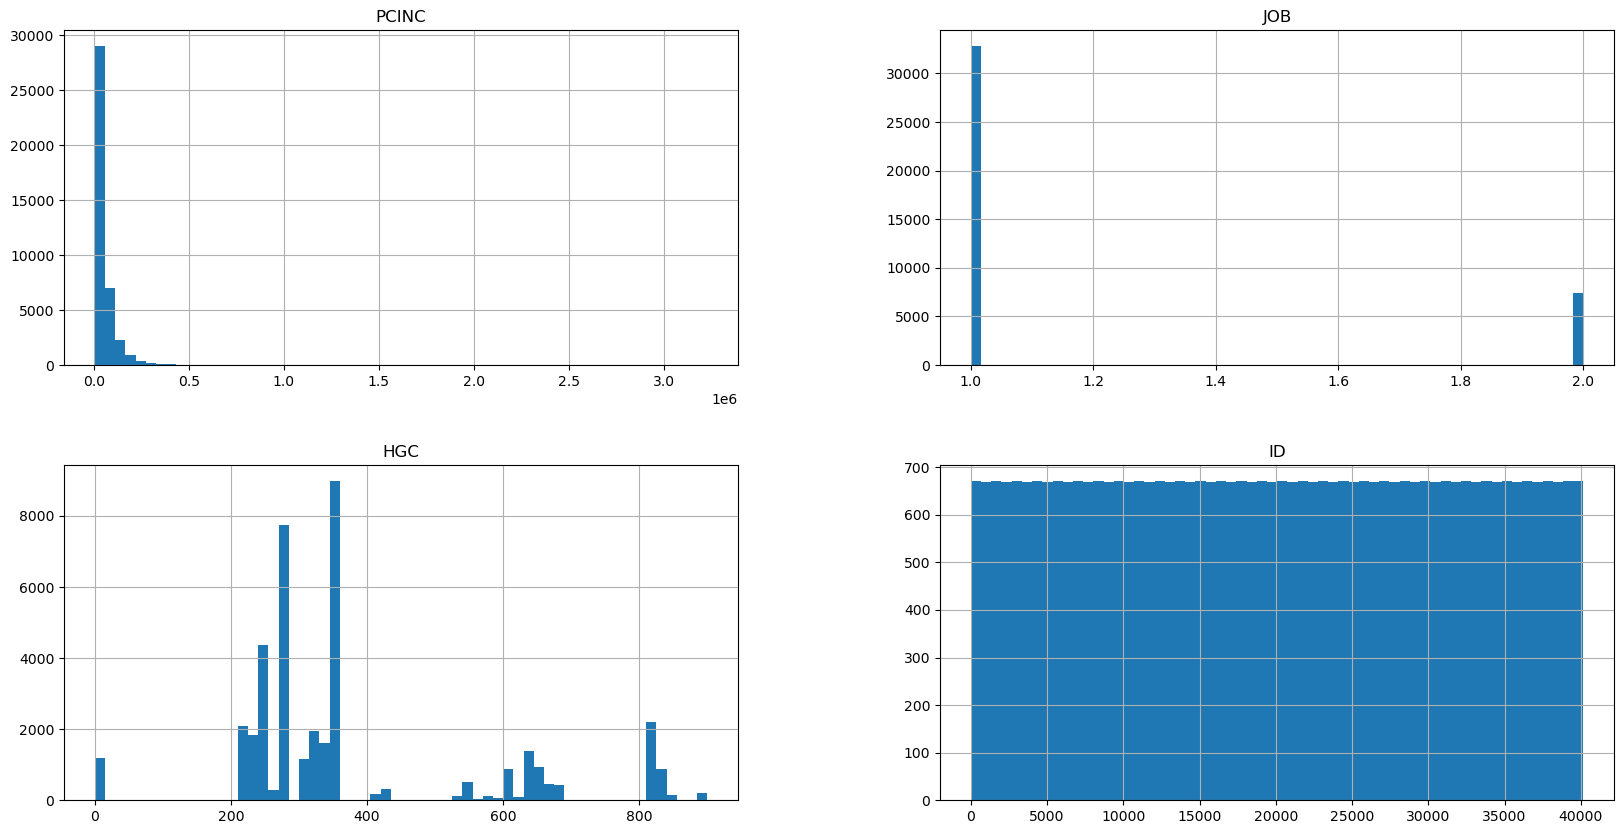

In [11]:
class_df.hist(bins=60, figsize=(20,10))

<Axes: xlabel='ID', ylabel='PCINC'>

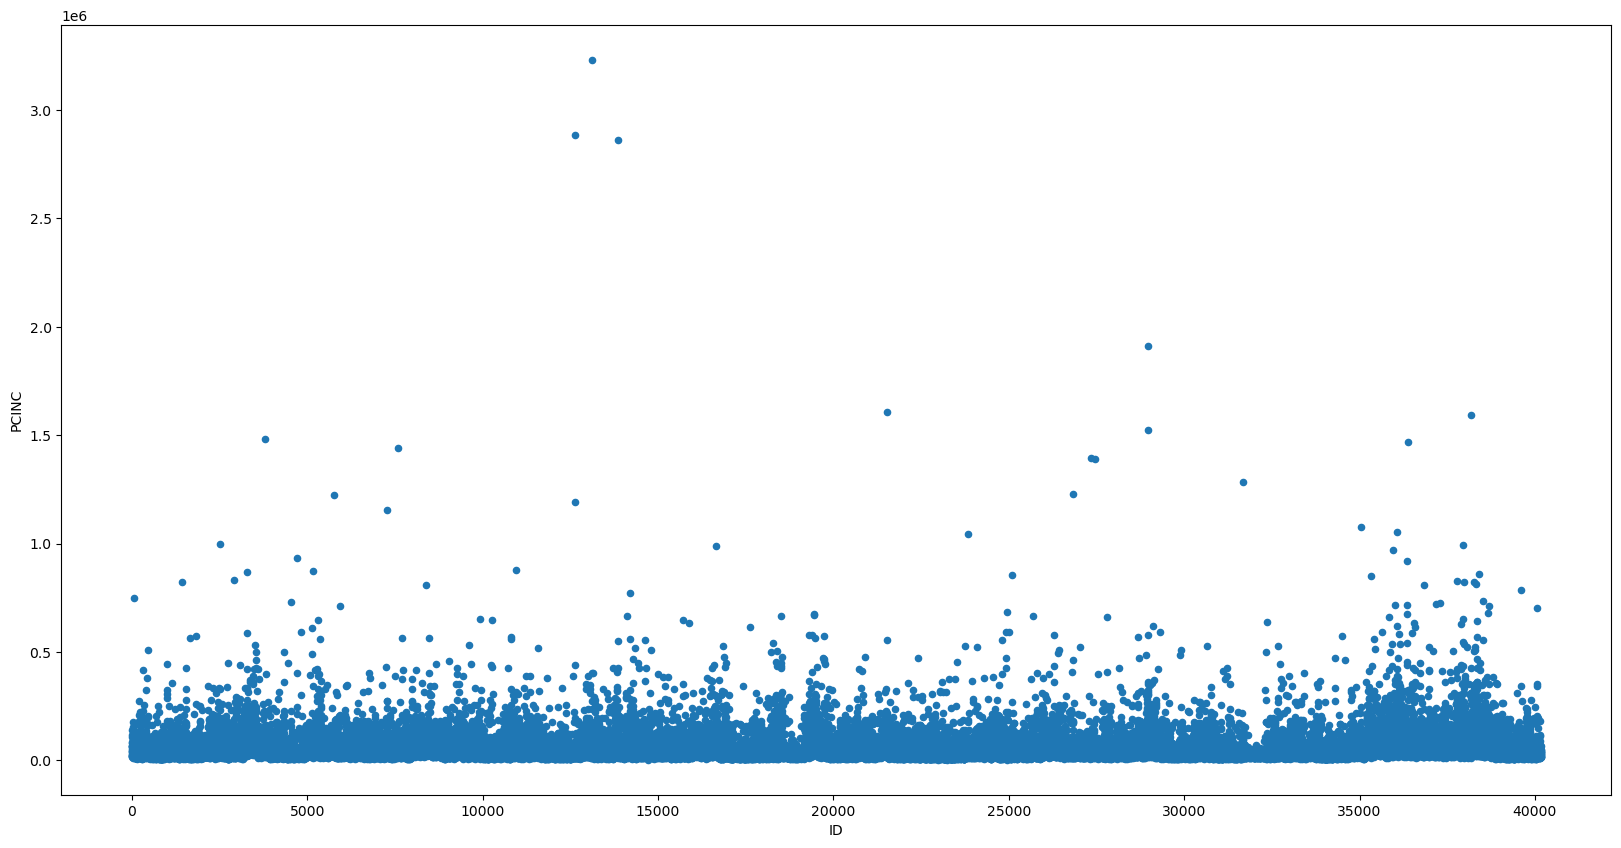

In [12]:
class_df[["ID", "PCINC"]].plot(kind="scatter", x="ID", y="PCINC", figsize=(20,10))

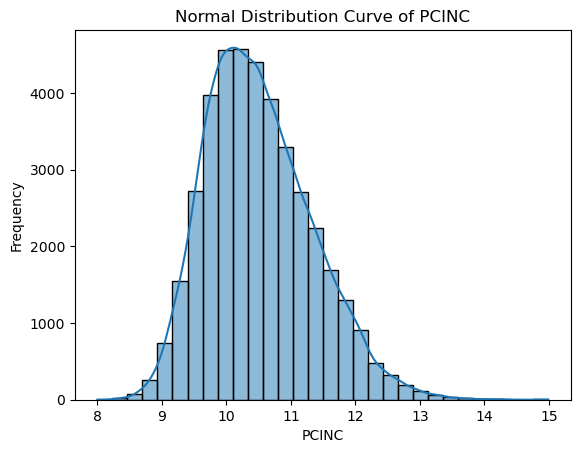

In [13]:
class_df.loc[:, 'PCINC'] = np.log1p(class_df['PCINC'])
class_df.drop(columns=["ID"], inplace=True)
sns.histplot(class_df['PCINC'], kde=True, bins=30)
plt.title("Normal Distribution Curve of PCINC")
plt.xlabel("PCINC")
plt.ylabel("Frequency")
plt.show()
# we have to ask ourselves why have this per capita income thingiemajig

In [14]:
#Just removing duplicates incase that their is.
class_df.drop_duplicates()


,CW,PCINC,JOB,HGC
0,3,11.593749,2,280
1,3,10.329820,1,250
2,3,11.373589,2,552
3,4,10.676526,1,830
4,1,10.531637,1,350
...,...,...,...,...
40166,3,10.312367,1,350
40167,1,9.572890,1,350
40168,3,9.859448,1,230
40169,2,10.341291,1,280


Splitting the data into 80% Training and 20% Testing for the classification problem.

In [15]:
X = class_df.drop(columns=["JOB"])
y = class_df["JOB"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, test_size=0.2)

# Exploratory Data Analysis (EDA)

The Exploratory Data Analysis (EDA) section aims to understand the relationships between variables in the dataset, particularly how different features correlate with each other. This process helps identify patterns, dependencies, and potential issues such as multicollinearity, which can impact the performance of machine learning models.

The first part of the code calculates the correlation matrix. The printed correlation matrix provides an overview of how each variable is related to the others.

In [17]:
corr_matrix = class_df.corr()
print(corr_matrix)

             CW     PCINC       JOB       HGC
CW     1.000000  0.049434  0.295854 -0.056936
PCINC  0.049434  1.000000  0.155909  0.482750
JOB    0.295854  0.155909  1.000000  0.024793
HGC   -0.056936  0.482750  0.024793  1.000000


To visualize these relationships, the heatmap is generated. The visual representation makes it easier to identify strong correlations between features.

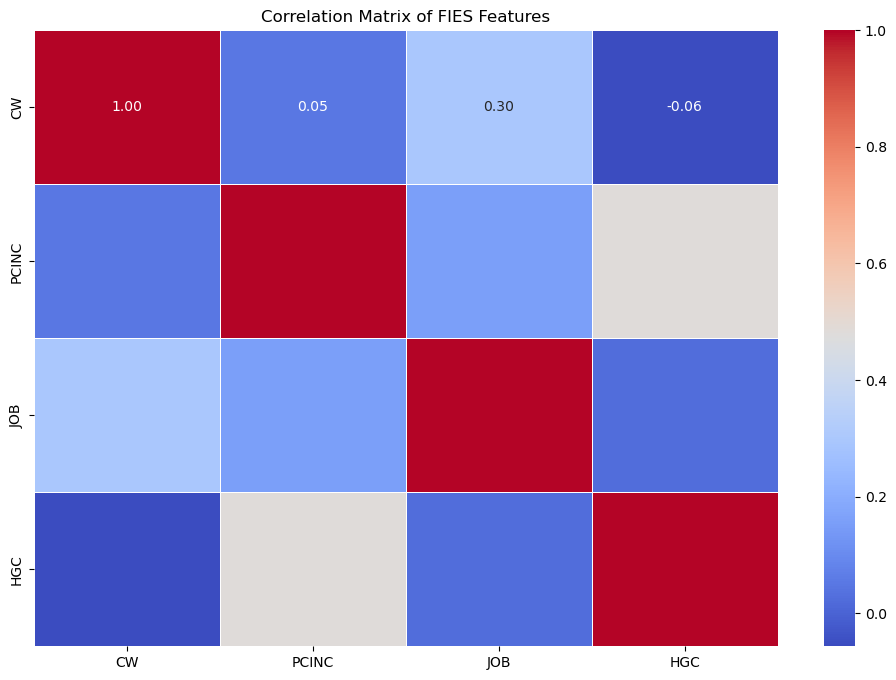

In [18]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of FIES Features")
plt.show()

The code processes the correlation matrix into a structured table format. The threshold for strong correlations is set at 0.1 for positive and -0.1 for negative. The filtered results are then sorted and displayed separately for positive and negative correlations.

In [19]:
# Define thresholds
positive_threshold = 0.1
negative_threshold = -0.1

# Convert correlation matrix into long format
corr_long = corr_matrix.stack().reset_index()
corr_long.columns = ["Feature 1", "Feature 2", "Correlation"]

# Remove self-correlations (Feature 1 == Feature 2)
corr_long = corr_long[corr_long["Feature 1"] != corr_long["Feature 2"]]

# Sort feature pairs alphabetically to remove duplicates
corr_long["Sorted Pair"] = corr_long.apply(lambda x: tuple(sorted([x["Feature 1"], x["Feature 2"]])), axis=1)

# Drop duplicate pairs
corr_long = corr_long.drop_duplicates(subset=["Sorted Pair"]).drop(columns=["Sorted Pair"])

# Filter positive and negative correlations
strong_positive = corr_long[corr_long["Correlation"] >= positive_threshold]
strong_negative = corr_long[corr_long["Correlation"] <= negative_threshold]

# Display tables
print("Strong Positive Correlations:")
print(strong_positive.sort_values(by="Correlation", ascending=False))

print("\nStrong Negative Correlations:")
print(strong_negative.sort_values(by="Correlation"))


Strong Positive Correlations:
  Feature 1 Feature 2  Correlation
7     PCINC       HGC     0.482750
2        CW       JOB     0.295854
6     PCINC       JOB     0.155909

Strong Negative Correlations:
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []


# Model Training

In this section, we will train the model based on the tasks. Once again, here are the tasks to be done.
1. Classify employment status based on education level and
2. Predict food budget for different family sizes

For these, we will divide into subsections for kNN Clustering, Linear Regression and Logistic Regression.

Let us print the shape of our data and our labels for our classification task.

In [20]:
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (32136, 3)
Training labels shape:  (32136,)
Test data shape:  (8035, 3)
Test labels shape:  (8035,)


Here our training data has 23774 inputs while the 5 represents the amount of features we want to see. Along with that, we have 5944 test data, again with 5 features to be utilized.

In [21]:
#just checking the desired label we want (has job or no job)
print(pd.Series(y_train).unique())


[1 2]


## k-Nearest Neighbors Algorithm

The first of our models is the k-Nearest Neighbors Algorithm. As was discussed, the intuition behind kNN is to calculate the distance between data points given a hyperparameter k then predict. Considering we are enacting a classification task, the kNN will predict based on majority among k-neighbors. 

For now, let us show the data in our dataset highlighting the features and the associated label.

In [ ]:
print("Our data set:")
print("Features (X) \t\t Label (y)")
for i in range(len(y_train)):
    print(str(X_train.iloc[i]) + " " + str(y_train.iloc[i]))

Now, we will use `sklearn.neighbors.KNeighborsClassifier`. This will help trivialize our tasks moving forward in training the kNN model

We import first KNeighborsClassifier class then instantiate it.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kNN_model = KNeighborsClassifier()

Now, we will train the model by fitting the data. In this case, the number of neighbors is set to 5, which is the default value in `sklearn.neighbors.KNeighborsClassifier`. 

In [ ]:
kNN_model.fit(X_train, y_train)

We can also display the feature values and corresponding distances calculated by the KNN model.

In [ ]:
neighbors = 5

(distances, data_index) = kNN_model.kneighbors(X_train, neighbors)

distances = distances[:, 1:]
data_index = data_index[:, 1:]

In [ ]:
distances = np.squeeze(distances)
data_index = np.squeeze(data_index)

print("The " + str(neighbors) + " nearest neighbors:")
for i in range(neighbors):
    print(i + 1, np.around(X_train.iloc[data_index[i]], 2), "\t dist: "+ str(np.around(distances[i], 2)))

Here, we display the nearest neighbors for each data point along with their distances to other points. Although we specified five neighbors, only four are shown because we excluded the closest one, which is typically the data point itself.

### Initial KNN Model Predictions

We are now ready to make predictions using our KNN model. We will first make predictions based on our training data.

In [ ]:
y_train_predicted = kNN_model.predict(X_train)
print(y_train_predicted)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_train, y_train_predicted))
print("Accuracy Score (Predictions):", accuracy_score(y_train, y_train_predicted))

We have an accuracy score of **89.54%** with the **training data**.

Let us now look at the performance of our KNN model with our testing data.

In [ ]:
y_test_predicted = kNN_model.predict(X_test)
print(y_test_predicted)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_test_predicted))
print("Accuracy Score (Predictions):", accuracy_score(y_test, y_test_predicted))

We have an accuracy score of **84.08%** with the **testing data**.

**The classification model achieved an overall accuracy of 84.08% on a dataset of 5,944 samples, correctly predicting approximately 84% of the test data.**  

For **class 1**, the model performed well, with a **precision of 0.89**, **recall of 0.92**, and an **F1-score of 0.91**, indicating strong predictive power for this class.  
However, for **class 2**, the model struggled, achieving a **precision of 0.46**, **recall of 0.38**, and an **F1-score of 0.42**, suggesting difficulty in correctly identifying instances of this class.  

The **macro average F1-score of 0.66** reflects this imbalance, as does the **weighted average F1-score of 0.83**, which is skewed by the dominant class.  
While the overall accuracy is high, there is still room for improvement.  


### KNN Model Error Analysis

### Improving KNN Model Performance

To enhance performance, we can apply **standardization** to the data, use **k-fold cross-validation**, and perform **hyperparameter tuning** to optimize the model. These techniques may help improve classification accuracy, particularly for the underrepresented class.

In [ ]:
#STANDARDIZATION
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [ ]:
#HYPERPARAMETER TUNING
from sklearn.model_selection import cross_val_score, StratifiedKFold

best_k = 1
best_score = 0
best_kfold = 5  # Default value

for kfold in range(3, 11):  # Testing different K-Fold values (3 to 10)
    skf = StratifiedKFold(n_splits=kfold, shuffle=True, random_state=42)

    for k in range(1, 30, 2):  # Testing odd values of K (to avoid ties)
        kNN_model = KNeighborsClassifier(n_neighbors=k, weights='distance')  # Use distance-based weighting
        scores = cross_val_score(kNN_model, X_train_scaled, y_train, cv=skf)  # K-Fold cross-validation
        avg_score = np.mean(scores)

        print(f"K-Fold: {kfold}, K: {k}    Avg. Score: {avg_score:.4f}")

        if avg_score > best_score:
            best_score = avg_score
            best_k = k
            best_kfold = kfold

print(f"\nBest K: {best_k} with accuracy: {best_score:.4f} using {best_kfold}-Fold Cross-Validation")


In [ ]:
# Train the final KNN model with the best K found
knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
knn.fit(X_train_scaled, y_train)

In [ ]:
#Make predictions
y_train_predicted = knn.predict(X_train_scaled)

In [ ]:
# Print the classification report and accuracy score
print("\nFinal Model Performance:")
print(classification_report(y_train, y_train_predicted))
print("Accuracy Score (Predictions):", accuracy_score(y_train, y_train_predicted))

In [ ]:
#Make predictions
y_test_predicted = knn.predict(X_test_scaled)

In [ ]:
# Print the classification report and accuracy score
print("\nFinal Model Performance:")
print(classification_report(y_test, y_test_predicted))
print("Accuracy Score (Predictions):", accuracy_score(y_test, y_test_predicted))

In [ ]:
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
final_cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=best_kfold, scoring='accuracy')
print(f"\nFinal Cross-Validation Accuracy: {np.mean(final_cv_scores):.4f} ± {np.std(final_cv_scores):.4f}")

### KNN Model Performance Summary

Original Train Accuracy:
Original Test Accuracy:

Optimized Train Accuracy:
Optimized Test Accuracy:

## Logistic Regression

Considering that all of our data have different numeric values. It's important that have standerdized to the same scale, to prevent any dominant features from overpowering the smaller one.

In [80]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

kf = KFold(n_splits=10, shuffle=True, random_state=13)

In [81]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
model = LogisticRegression(C=0.0001, penalty='l1', solver='liblinear')
model.fit(X_train_scaled, y_train)

f1_scores = cross_val_score(model, X_train_scaled, y_train, scoring='f1_macro', cv=kf)
accuracy_scores = cross_val_score(model, X_train_scaled, y_train, scoring='accuracy', cv=kf)

print(f"Training F1-score: {np.mean(f1_scores)}")
print(f"Training Accuracy: {np.mean(accuracy_scores)}")

y_predicted = model.predict(X_test_scaled)
f1_test = f1_score(y_test, y_predicted, average='macro')
accuracy_test = accuracy_score(y_test, y_predicted)

print(f"Test F1-score: {f1_test}")
print(f"Test Accuracy: {accuracy_test}")


Training F1-score: 0.44944632505112675
Training Accuracy: 0.8163743531015394
Test F1-score: 0.44954442693704183
Test Accuracy: 0.8166770379589297


In [49]:
def confusion_matrx(y_true, y_predicted):
    cm = confusion_matrix(y_true, y_predicted)  
    print(cm)

confusion_matrx(y_test, y_predicted)

[[6359  203]
 [1462   11]]


In [50]:
unique, counts = np.unique(y_predicted, return_counts=True)
count_dict = dict(zip(unique, counts))
print(count_dict)

{1: 7821, 2: 214}


### Detecting Overfitting in Logistic Regression Model

Considering that out training of our model had a high accuracy and f1-score we have to make sure that our is not overfitting.

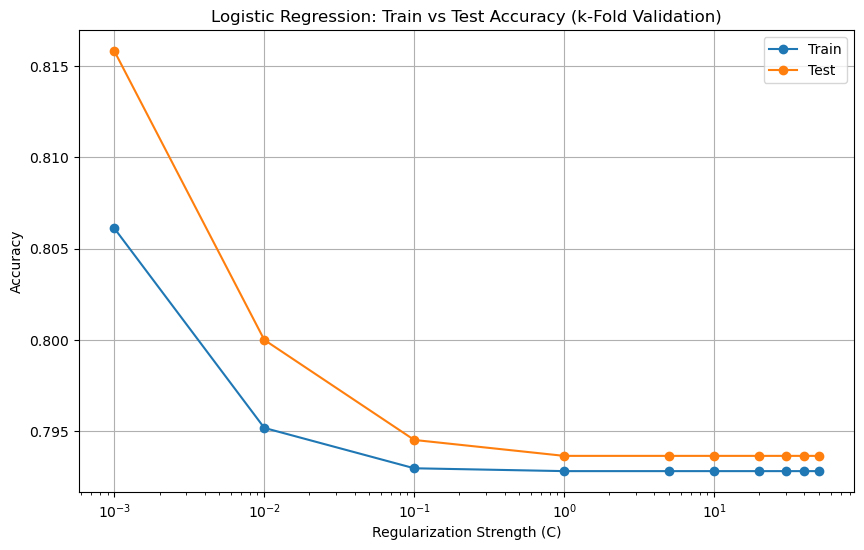

In [31]:
C_values = [0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 50]
train_scores = []
valid_scores = []
k = 5 

for C in C_values:
    model = LogisticRegression(C=C, random_state=11)

    train_score = np.mean(cross_val_score(model, X_train_scaled, y_train, cv=k))
    valid_score = np.mean(cross_val_score(model, X_test_scaled, y_test, cv=k))

    train_scores.append(train_score)
    valid_scores.append(valid_score)

plt.figure(figsize=(10, 6))
plt.plot(C_values, train_scores, label='Train', marker='o')
plt.plot(C_values, valid_scores, label='Test', marker='o')
plt.xlabel('Regularization Strength (C)')
plt.title('Logistic Regression: Train vs Test Accuracy (k-Fold Validation)')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

The plot shows that as C increases, both train and test accuracy improve, suggesting reduced underfitting. Since the two curves remain close, the model generalizes well without significant overfitting. The best C value balances high test accuracy with minimal train-test gap.

In [ ]:
print(classification_report(y_test, y_predicted))

Let's try to improve our logistic regression model! GridSearch 

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 2, 15),
    'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs', 'sag'],
    'max_iter': [100, 500, 1000, 2500]
}
model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1)
best_grid = grid_search.fit(X_train_scaled, y_train)
best_grid.best_estimator_
 

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To kee

LogisticRegression(C=0.0001, penalty='l1', solver='liblinear')

In [51]:
n_model = LogisticRegression(C=0.0001, penalty='l1', solver='liblinear')
n_model.fit(X_train_scaled, y_train)

f1_scores = cross_val_score(n_model, X_train_scaled, y_train, scoring='f1', cv=kf)
accuracy_scores = cross_val_score(n_model, X_train_scaled, y_train, scoring='accuracy', cv=kf)

print(f"Training F1-score: {np.mean(f1_scores)}")
print(f"Training Accuracy: {np.mean(accuracy_scores)}")

y_predicted = n_model.predict(X_test_scaled)
f1_test = f1_score(y_test, y_predicted)
accuracy_test = accuracy_score(y_test, y_predicted)

print(f"Test F1-score: {f1_test}")
print(f"Test Accuracy: {accuracy_test}")


Training F1-score: 0.8988926501022535
Training Accuracy: 0.8163743531015394
Test F1-score: 0.8990888538740837
Test Accuracy: 0.8166770379589297


In [66]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[6562,    0],
       [1473,    0]])

In [67]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       0.82      1.00      0.90      6562
           2       0.00      0.00      0.00      1473

    accuracy                           0.82      8035
   macro avg       0.41      0.50      0.45      8035
weighted avg       0.67      0.82      0.73      8035



In [ ]:
from typing import Counter
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=11)
X_train_balanced, y_train_balanced = smote_enn.fit_resample(X_train_scaled, y_train)
print("Balanced class distribution:", Counter(y_train_balanced))



Balanced class distribution: Counter({1: 17516, 2: 14590})


In [72]:
n_model = LogisticRegression(C=0.0001, class_weight='balanced', penalty='l1', solver='liblinear')
n_model.fit(X_train_balanced, y_train_balanced)

f1_scores = cross_val_score(n_model, X_train_balanced, y_train_balanced, scoring='f1_macro', cv=kf)
accuracy_scores = cross_val_score(n_model, X_train_balanced, y_train_balanced, scoring='accuracy', cv=kf)

print(f"Training F1-score: {np.mean(f1_scores)}")
print(f"Training Accuracy: {np.mean(accuracy_scores)}")

y_predicted = n_model.predict(X_test_scaled)
f1_test = f1_score(y_test, y_predicted , average='macro')
accuracy_test = accuracy_score(y_test, y_predicted)

print(f"Test F1-score: {f1_test}")
print(f"Test Accuracy: {accuracy_test}")


Training F1-score: 0.3529550270410785
Training Accuracy: 0.5455675438111398
Test F1-score: 0.44954442693704183
Test Accuracy: 0.8166770379589297


In [75]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=11)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
print("Balanced class distribution:", Counter(y_train_balanced))

Balanced class distribution: Counter({1: 26235, 2: 26235})


In [76]:
n_model = LogisticRegression(C=0.0001, class_weight='balanced', penalty='l1', solver='liblinear')
n_model.fit(X_train_balanced, y_train_balanced)

f1_scores = cross_val_score(n_model, X_train_balanced, y_train_balanced, scoring='f1_macro', cv=kf)
accuracy_scores = cross_val_score(n_model, X_train_balanced, y_train_balanced, scoring='accuracy', cv=kf)

print(f"Training F1-score: {np.mean(f1_scores)}")
print(f"Training Accuracy: {np.mean(accuracy_scores)}")

y_predicted = n_model.predict(X_test_scaled)
f1_test = f1_score(y_test, y_predicted , average='macro')
accuracy_test = accuracy_score(y_test, y_predicted)

print(f"Test F1-score: {f1_test}")
print(f"Test Accuracy: {accuracy_test}")

Training F1-score: 0.3333211471029242
Training Accuracy: 0.5000000000000001
Test F1-score: 0.564489973806237
Test Accuracy: 0.5853142501555694


### Feature Importance in Logistic Regression Model

The model demonstrates exceptionally high accuracy. Feature importance analysis is used to identify which feature contributes most to this performance.

In [ ]:
# Extract feature importance (coefficients)
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_[0]  # Extract coefficients for each feature
})

In [ ]:
# Sort by absolute coefficient value (strongest to weakest)
feature_importance["Abs_Coefficient"] = feature_importance["Coefficient"].abs()
feature_importance = feature_importance.sort_values(by="Abs_Coefficient", ascending=False)
print(feature_importance[["Feature", "Coefficient"]])

OCCUP has the highest coefficient by a significant margin compared to other features. To assess its impact on the model's high accuracy, it will be dropped from the training data and the results will be observed.

In [ ]:
X_train_reduced = X_train.drop(columns=["OCCUP"])
X_test_reduced = X_test.drop(columns=["OCCUP"])
model_reduced = LogisticRegression()
model_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = model_reduced.predict(X_test_reduced)
print(confusion_matrix(y_test, y_pred_reduced))

In [ ]:
print(X_train["OCCUP"].corr(y_train))

In [ ]:
from sklearn.metrics import accuracy_score
print("Original Model Accuracy:", accuracy_score(y_test, y_pred))
print("Reduced Model Accuracy:", accuracy_score(y_test, y_pred_reduced))

Accuracy went down by a lot after OCCUP was dropped. 

### Decision Tree

In this subsection, we will create a neural network model. Now, let us just first set the theoretical knowledge we are given. We have 5 we want to look at, therefore we have 5 input nodes. Then, we have a classification task. Considering that there is only an output of whether someone is predicted to have a job or not.

In doing our Neural Network, we will utilize a Stratified KFold and a Mini-Batch Gradient Descent

Now, to formally start, we will first import the necessary libraries for creating a neural network. The one we will use is torch.

In [ ]:
import optuna

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree


import numpy as np


In [ ]:
X_dtc = X[['CW', 'OCCUP']].astype(int)

In [ ]:
X_dtc = X_dtc.to_numpy()


In [ ]:
y_dtc = y.to_numpy()

In [ ]:
y_dtc = (y_dtc == 1)

In [ ]:
y_dtc = y_dtc.astype(int)

In [ ]:
y_dtc


In [ ]:
np.unique(y_dtc)

At this time, we will now utilize a stratified KFold. To note, there exists simply a KFold and a Stratified KFold. Difference being KFold works best with a balanced dataset. After viewing the amount of those classified with 1 and 2 in the JOB column earlier, it is best to use Stratified KFold.

First, let us set the parameters of the KFold.

In [ ]:
k_folds = 10
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

In [ ]:
# accuracies = []

train_acc = []
test_acc = []

for train_index, test_index in skf.split(X_dtc, y_dtc):
    X_train, X_test = X_dtc[train_index], X_dtc[test_index]
    y_train, y_test = y_dtc[train_index], y_dtc[test_index]
    
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    
    # accuracies.append(acc)
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)
    
    
    print(f"Fold Accuracy: {acc:.4f}")
    print(f"Train Accuracy: {train_acc}")
    print(f"Test Accuracy: {test_acc}")
# print(f"Mean Accuracy: {np.mean(accuracies):.4f}")



In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    DecisionTreeClassifier(random_state=42),
    X_dtc, y_dtc,
    cv=skf,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10)
)


train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker="o", linestyle="--", color="blue")
plt.plot(train_sizes, test_mean, label="Test Accuracy", marker="s", color="red")

plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [ ]:
def describe_tree(clf):
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold
    values = clf.tree_.value

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
    while len(stack) > 0:
        # `pop` ensures each node is only visited once
        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        # If the left and right child of a node is not the same we have a split
        # node
        is_split_node = children_left[node_id] != children_right[node_id]
        # If a split node, append left and right children and depth to `stack`
        # so we can loop through them
        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True

    print(
        "The binary tree structure has {n} nodes and has "
        "the following tree structure:\n".format(n=n_nodes)
    )
    for i in range(n_nodes):
        if is_leaves[i]:
            print(
                "{space}node={node} is a leaf node, values: {values}.".format(
                    space=node_depth[i] * "\t", node=i, values=values[i]
                )
            )
        else:
            print(
                "{space}node={node} is a split node: "
                "go to node {left} if X[:, {feature}] <= {threshold} "
                "else to node {right}.".format(
                    space=node_depth[i] * "\t",
                    node=i,
                    left=children_left[i],
                    feature=feature[i],
                    threshold=threshold[i],
                    right=children_right[i],
                )
            )

In [ ]:
describe_tree(model)

In [ ]:
tree.plot_tree(model)
plt.show()
tree.export_graphviz(model,out_file='tree.dot')                

#### Error Analysis

In the earlier code output, we get to see the average loss on our training model and the accuracy and F1-score of our test data onto our trained model. 

To reiterate, the average loss on our training model is around 0.475 floating number while the accuracy of the test data on the trained model sees around 0.8479 accuracy and an F1-score about 0.9177. 

To interpret this, we get to say that the model still has very much to improve on, and much to be desired. An accuracy this low begs to be interpreted that our 84% of the time the model is correct. As opposed to other models, this accuracy and F1-score is inferior.

#### Model Improvement 

In [ ]:
import optuna

In [ ]:
def objective(trial):
    
    max_depth = trial.suggest_int("max_depth", 3, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
    ccp_alpha = trial.suggest_float("ccp_alpha", 0.01, 0.2)

    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        ccp_alpha=ccp_alpha,
        random_state=42
    )

    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    accuracy = cross_val_score(model, X_dtc, y_dtc, cv=skf, scoring="accuracy").mean()

    return accuracy


study = optuna.create_study(direction="maximize") 
study.optimize(objective, n_trials=50)  


print("Best hyperparameters:", study.best_params)
print(f"Best accuracy: {study.best_value:.4f}")

In [ ]:
best_model = DecisionTreeClassifier(
    max_depth=study.best_params["max_depth"],
    min_samples_split=study.best_params["min_samples_split"],
    min_samples_leaf=study.best_params["min_samples_leaf"],
    ccp_alpha=study.best_params["ccp_alpha"],
    random_state=42
)
best_model.fit(X_dtc, y_dtc) 

plt.figure(figsize=(15, 8))
plot_tree(best_model, class_names=True, filled=True)
plt.show()

# Model Performance Summary

In this section of the notebook, a performance summary will be discussed. Here, a quick discussion of the results of each improved model 

# Insights and Conclusions

# References